In [1]:
import pandas as pd
import jieba as jb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
# 1、获取数据
all_pd_data = pd.read_excel(io="../src/gastric.xlsx", engine="openpyxl")

In [3]:
all_pd_data

,Label,Text
0,1,（胃体小弯活检）\n粘膜慢性活动性萎缩性炎伴腺体中度肠化及糜烂，局灶腺体粘液样变及低级别上皮...
1,1,（胃窦小弯）粘膜慢性活动性炎伴少量出血，另见少量炎性渗出，局灶腺体低级别上皮内瘤变。\n幽门...
2,1,慢性轻度萎缩性胃（窦小弯）炎伴腺体轻度肠化及浅表糜烂，局灶腺体低级别上皮内瘤变。\n幽门螺旋...
3,1,1、（胃窦小弯活检）粘膜慢性活动性炎伴浅表糜烂。\n2、（胃体后壁活检）黏膜慢性炎伴局灶呈息...
4,1,1、（胃角活检）粘膜慢性炎伴轻度肠化及少量出血、糜烂，局灶腺体低级别上皮内瘤变。\n2、（胃...
...,...,...
245,5,1、（胃角活检）黏膜慢性活动性炎伴部分腺体高级别上皮内瘤变，局灶癌变，并可见印戒细胞。\n2...
246,5,（胃角、贲门下）低分化腺癌，见少量印戒细胞癌。
247,5,1.（胃幽门前区）粘膜慢性炎，部分腺体高级别上皮内瘤变，部分为印戒细胞，未见明确侵犯，送检组...
248,5,（全胃癌根治术标本）\n 1、肿瘤情况：\n（1）组织学分型与分级：\n 胃窦印戒细胞...


In [4]:
#   * 加载停用词
with open('../src/stop_words.txt', 'r',
          encoding="utf-8") as f:
    stop_words = list(l.strip() for l in f.readlines())
stop_words.extend(['\n', '（', '）', ' '])  # 由于停用词中没有'\n'和中文的左右括号和空格，所以单独再加上去

In [5]:
stop_words

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一般',
 '一转眼',
 '万一',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罢',
 '了',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们'

In [6]:
# 2、数据预处理
#   * 对中文文本进行分词
all_pd_data['Pre_Text'] = all_pd_data['Text'].apply(
    lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stop_words]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\冷月\AppData\Local\Temp\jieba.cache
Loading model cost 0.750 seconds.
Prefix dict has been built successfully.


In [7]:
all_pd_data

,Label,Text,Pre_Text
0,1,（胃体小弯活检）\n粘膜慢性活动性萎缩性炎伴腺体中度肠化及糜烂，局灶腺体粘液样变及低级别上皮...,胃体 弯 活检 粘膜 慢性 活动性 萎缩性 炎伴 腺体 中度 肠化 糜烂 局灶 腺体 粘液 ...
1,1,（胃窦小弯）粘膜慢性活动性炎伴少量出血，另见少量炎性渗出，局灶腺体低级别上皮内瘤变。\n幽门...,胃窦 小弯 粘膜 慢性 活动性 炎伴 少量 出血 另见 少量 炎性 渗出 局灶 腺体 低 级...
2,1,慢性轻度萎缩性胃（窦小弯）炎伴腺体轻度肠化及浅表糜烂，局灶腺体低级别上皮内瘤变。\n幽门螺旋...,慢性 轻度 萎缩性 胃 窦小弯 炎伴 腺体 轻度 肠化 浅表 糜烂 局灶 腺体 低 级别 上...
3,1,1、（胃窦小弯活检）粘膜慢性活动性炎伴浅表糜烂。\n2、（胃体后壁活检）黏膜慢性炎伴局灶呈息...,胃窦 小弯 活检 粘膜 慢性 活动性 炎伴 浅表 糜烂 胃体 后壁 活检 黏膜 慢性 炎伴 ...
4,1,1、（胃角活检）粘膜慢性炎伴轻度肠化及少量出血、糜烂，局灶腺体低级别上皮内瘤变。\n2、（胃...,胃角 活检 粘膜 慢性 炎伴 轻度 肠化 少量 出血 糜烂 局灶 腺体 低 级别 上皮 内瘤...
...,...,...,...
245,5,1、（胃角活检）黏膜慢性活动性炎伴部分腺体高级别上皮内瘤变，局灶癌变，并可见印戒细胞。\n2...,胃角 活检 黏膜 慢性 活动性 炎伴 部分 腺体 高级别 上皮 内瘤 变 局灶 癌变 印戒 ...
246,5,（胃角、贲门下）低分化腺癌，见少量印戒细胞癌。,胃角 贲门 低 分化腺癌 见 少量 印戒 细胞 癌
247,5,1.（胃幽门前区）粘膜慢性炎，部分腺体高级别上皮内瘤变，部分为印戒细胞，未见明确侵犯，送检组...,. 胃 幽门 前区 粘膜 慢性 炎 部分 腺体 高级别 上皮 内瘤 变 部分 印戒 细胞 未...
248,5,（全胃癌根治术标本）\n 1、肿瘤情况：\n（1）组织学分型与分级：\n 胃窦印戒细胞...,全 胃癌 根治术 标本 肿瘤 情况 组织 学分 型 分级 胃窦 印戒 细胞 癌 少部分 粘液...


In [8]:
#   * 划分训练集和测试集 （按照Label采用分层抽样，保证训练集和测试集样本均匀）
file_txt_train, file_txt_test = train_test_split(all_pd_data, test_size=0.2, stratify=all_pd_data['Label'])

In [9]:
# 3、特征工程
#   * 3.1、求出训练集tf-idf
#   *   3.1.1、实例化一个转换器类
transfer = TfidfVectorizer(stop_words=stop_words)
#   *   3.1.2、调用fit_transform
x_train = transfer.fit_transform(file_txt_train["Pre_Text"])
x_test = transfer.transform(file_txt_test["Pre_Text"])
x_train_feature = transfer.get_feature_names()
x_train = x_train.toarray()
x_test = x_test.toarray()
y_train = file_txt_train["Label"].tolist()
y_test = file_txt_test["Label"].tolist()
# print("文本特征抽取的结果：\n", x_train.toarray())
# print("返回特征名字：\n", transfer.get_feature_names())

d:\python3.9\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
# x_train_feature.shape # (200, 392)特征过多
x_train,x_train.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.24036709],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.23350919],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 (200, 378))

In [11]:
#   * 3.2、通过PCA降维
#   *   3.2.1、实例化一个转换器类PCA
transfer = PCA(n_components=80)
#   *   3.2.1、调用fit_transform
x_train = transfer.fit_transform(x_train, x_train_feature)
x_test = transfer.transform(x_test)
#   * 3.3、准备超参数
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    "max_depth": [5, 8, 15, 25, 30]
}

In [12]:
x_train.shape  # (200, 80)

(200, 80)

In [13]:
# 4、构建随机森林模型
estimator = RandomForestClassifier()
estimator = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=3)
# 开始训练
estimator.fit(x_train, y_train)
#   * 保存模型
joblib.dump(estimator, "./随机森林模型.pkl")

['./随机森林模型.pkl']

In [14]:
# 5、评估模型
#   * 加载模型
estimator = joblib.load("./随机森林模型.pkl")
#   * 进行预测
y_predict = estimator.predict(x_test)
# 计算准确率
score = estimator.score(x_test, y_test)
print("准确率：\n", score)

# 查看最佳参数,最佳结果,最佳估计器
print("查看最佳参数:\n", estimator.best_params_)
print("最佳结果：\n", estimator.best_score_)

准确率：
 0.76
查看最佳参数:
 {'max_depth': 8, 'n_estimators': 400}
最佳结果：
 0.8801447308909996


Text(0, 0.5, '分类')

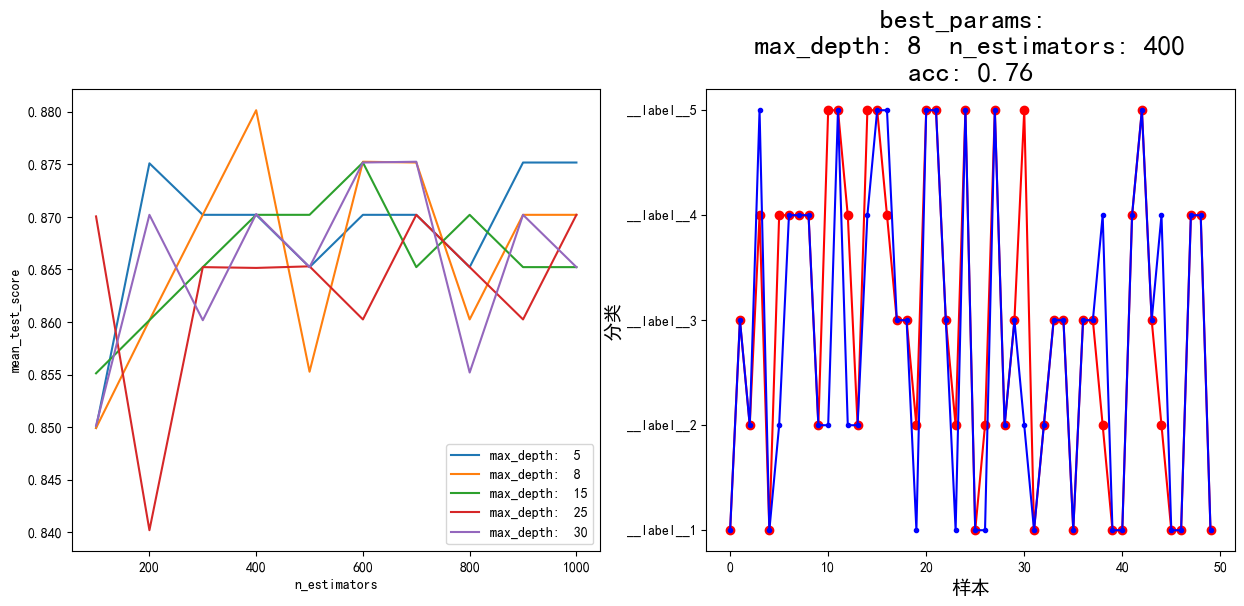

In [15]:
#   * 绘图
results = pd.DataFrame(estimator.cv_results_)
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 显示中文标签
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
each_length = len(param_grid.get("n_estimators"))  # 每次森林树木数量的种类
for i in range(len(param_grid.get("max_depth"))):
    plt.plot(param_grid.get("n_estimators"), results["mean_test_score"].tolist()[i * each_length:(i + 1) * each_length],
             label="max_depth:  " + str(param_grid.get("max_depth")[i]))
plt.legend()

plt.subplot(122)
scale_ls = range(1, 6)
plt.title(f"best_params: \n"
          f"max_depth: {estimator.best_params_.get('max_depth')}  "
          f"n_estimators: {estimator.best_params_.get('n_estimators')}\n"
          f"acc: {score}", fontsize=20)
index_ls = ['__label__1', '__label__2', '__label__3', '__label__4', '__label__5']
plt.yticks(scale_ls, index_ls)  ## 可以设置坐标字
plt.plot(y_test, color="red", marker='o', label="真实分类")
plt.plot(y_predict, color="blue", marker='.', label="预测分类")
plt.xlabel("样本", fontsize=14)
plt.ylabel("分类", fontsize=14)